In [1]:
from sklearn import datasets

In [2]:
X,y=datasets.make_blobs(n_samples=200,centers=[[5,5],[10,10]],cluster_std=1.5);

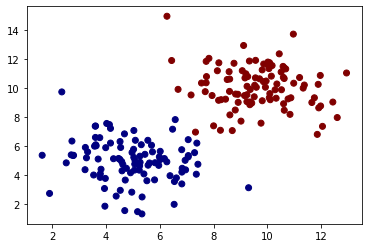

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array(X);
a,b=X.T;
plt.scatter(a,b,c=y,cmap='jet')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
import torch
X_train=torch.from_numpy(X_train.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_test=torch.from_numpy(Y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)

In [5]:
class Logistic_Reg_model(torch.nn.Module):
 def __init__(self,no_input_features):
   super(Logistic_Reg_model,self).__init__()
   self.linear=torch.nn.Linear(no_input_features,1)
 def forward(self,x):
   y_predicted=torch.sigmoid(self.linear(x))
   return y_predicted

In [15]:
model=Logistic_Reg_model(2)
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
number_of_epochs=10000
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=criterion(y_prediction,Y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%1000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 1000 ,loss= 0.49335283041000366
epoch: 2000 ,loss= 0.3868766129016876
epoch: 3000 ,loss= 0.31734299659729004
epoch: 4000 ,loss= 0.2693534195423126
epoch: 5000 ,loss= 0.23457328975200653
epoch: 6000 ,loss= 0.2083282470703125
epoch: 7000 ,loss= 0.18786342442035675
epoch: 8000 ,loss= 0.17147281765937805
epoch: 9000 ,loss= 0.1580527275800705
epoch: 10000 ,loss= 0.14686134457588196


In [16]:
def model_plot(model,X,y,title,pt):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    plt.scatter(pt[0],pt[1],c='y',cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0-b-w[0]*u)/w[1])
    plt.title(title)
    plt.show()

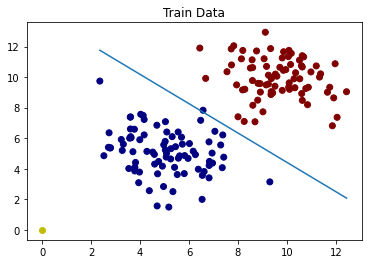

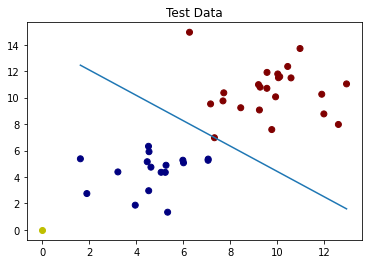

In [17]:
model_plot(model,X_train,Y_train,'Train Data',[0,0])
model_plot(model,X_test,Y_test,'Test Data',[0,0])

In [ ]:
#red=1,blue=0
#path taken by the point is exactly perpendicular to classification line, I had calculated slope of line taken by point
x0=torch.rand((1,2),requires_grad=True)
x0.requires_grad
x1_hist=[]
x2_hist=[]
optimizer=torch.optim.SGD([x0],lr=0.01,momentum=0.9)
for i in range(500001):
      optimizer.zero_grad();
      loss=-model(x0);
      loss.backward();
      optimizer.step();
      if(i%10000==0):
        #model_plot(model,X,y,'Data',x0.detach().numpy()[0]);
        u=x0[0].clone().detach().numpy();
        x1_hist.append(u[0])
        x2_hist.append(u[1])
xt=x0.detach().numpy();

In [ ]:
def model_plot1(model,X,y,title,x1_hist,x2_hist):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    plt.scatter(x1_hist,x2_hist,c='y',cmap='jet')
    plt.plot(x1_hist,x2_hist)
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])
    plt.title(title)
    plt.show()

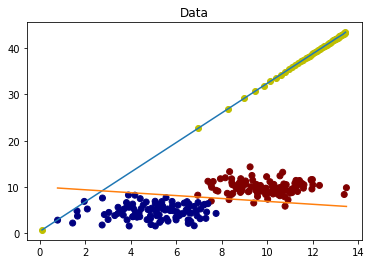

In [ ]:
model_plot1(model,X,y,'Data',x1_hist,x2_hist)

In [ ]:
x1_hist,x2_hist

([0.09336426,
  6.9495425,
  8.269984,
  8.976871,
  9.460194,
  9.827256,
  10.123206,
  10.371003,
  10.584227,
  10.771638,
  10.938296,
  11.087815,
  11.224753,
  11.350443,
  11.466113,
  11.573288,
  11.673896,
  11.769263,
  11.856458,
  11.942288,
  12.01988,
  12.096174,
  12.169171,
  12.235929,
  12.302686,
  12.368757,
  12.425978,
  12.483198,
  12.540419,
  12.597639,
  12.648466,
  12.69615,
  12.743834,
  12.791517,
  12.839201,
  12.886885,
  12.931786,
  12.969933,
  13.00808,
  13.0462265,
  13.084373,
  13.12252,
  13.160667,
  13.198814,
  13.236961,
  13.275108,
  13.313255,
  13.342185,
  13.370795,
  13.3994055,
  13.428016],
 [0.7619718,
  22.672594,
  26.892435,
  29.151337,
  30.695904,
  31.869108,
  32.815258,
  33.606285,
  34.288143,
  34.88526,
  35.417027,
  35.895805,
  36.332104,
  36.732346,
  37.104958,
  37.44828,
  37.766506,
  38.071682,
  38.35147,
  38.6185,
  38.883198,
  39.11208,
  39.34096,
  39.569843,
  39.778984,
  39.96972,
  40.160454